![](http://miro.medium.com/max/3840/1*NcqhsFhED_W9OnyI0ZO3jA.jpeg)

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,MaxPooling2D,Dropout,Activation,BatchNormalization,Flatten
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
from keras_preprocessing.image import ImageDataGenerator,load_img
from sklearn.model_selection import train_test_split 
import random
import os
from PIL import Image

# Collecting data

In [2]:
data_dir = '../input/gtsrb-german-traffic-sign/'
train_path = '../input/gtsrb-german-traffic-sign/Train'
data = pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')
data1 = pd.read_csv('../input/gtsrblabel-names/label_names.csv')

# Resizing the images to 30x30x3

height = 30
width = 30
channels = 3

In [3]:
num_categories = len(os.listdir(train_path))#length of the path 
num_categories


43

# Data Preprocessing

In [4]:
m= data.drop(['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'],1)
m


,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png
...,...,...
39204,42,Train/42/00042_00007_00025.png
39205,42,Train/42/00042_00007_00026.png
39206,42,Train/42/00042_00007_00027.png
39207,42,Train/42/00042_00007_00028.png


# Joining DataFrames
**Full Outer Join The FULL OUTER JOIN combines the results of both the left and the right outer joins. The joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. You can perform a full outer join by specifying the how argument as outer in the merge() function:**

In [5]:
data = pd.merge(data1, m, on='ClassId', how='outer')
data

,ClassId,SignName,Path
0,0,Speed limit (20km/h),Train/0/00000_00000_00000.png
1,0,Speed limit (20km/h),Train/0/00000_00000_00001.png
2,0,Speed limit (20km/h),Train/0/00000_00000_00002.png
3,0,Speed limit (20km/h),Train/0/00000_00000_00003.png
4,0,Speed limit (20km/h),Train/0/00000_00000_00004.png
...,...,...,...
39204,42,End of no passing by vehicles over 3.5 metric ...,Train/42/00042_00007_00025.png
39205,42,End of no passing by vehicles over 3.5 metric ...,Train/42/00042_00007_00026.png
39206,42,End of no passing by vehicles over 3.5 metric ...,Train/42/00042_00007_00027.png
39207,42,End of no passing by vehicles over 3.5 metric ...,Train/42/00042_00007_00028.png


# Plotting the number of images in each class

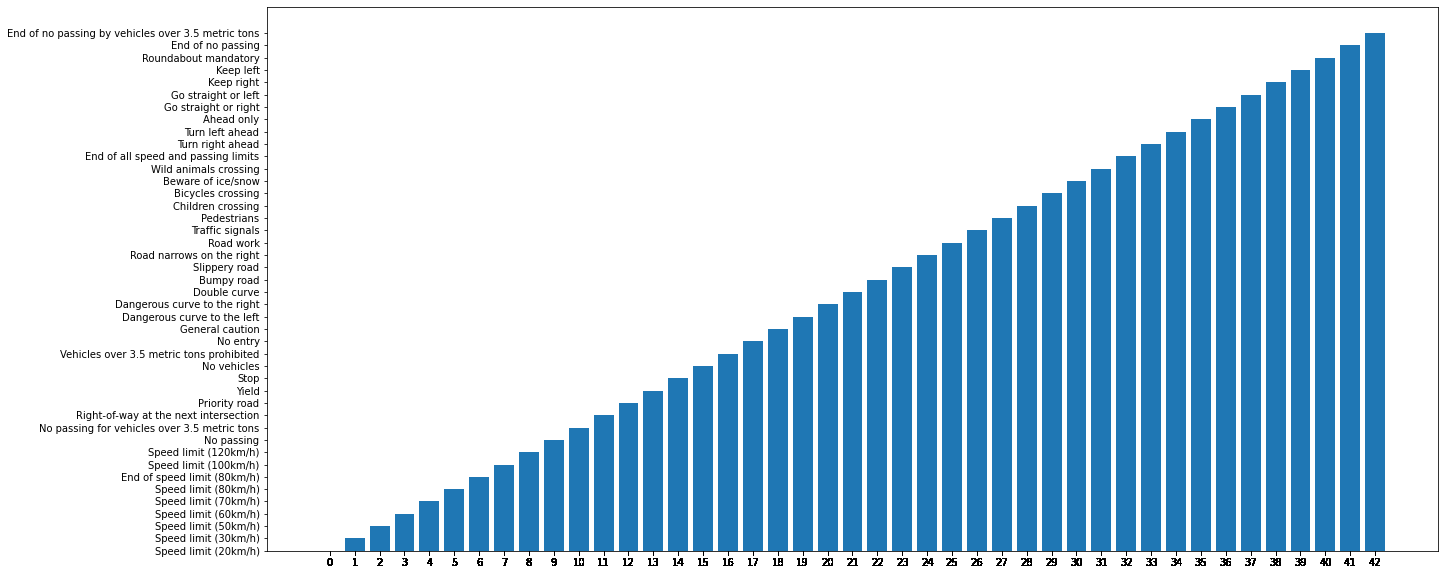

In [6]:
plt.figure(figsize=(21,10))  
plt.bar(data['ClassId'], data['SignName'])
plt.xticks(data['ClassId'],rotation='horizontal')
plt.show()


# Prepairng data & labels creating nested loop 

1. **creating for loop with range of 43 no of diffrent catergories it will iterate one bye one**
2. **os.path.join() method in Python join one or more path components. This method concatenates various path components with exactly one directory separator (‘/’) following each non-empty part except the last path component.**
3. **creating that for loop it will itrate the string value to get diffrent no of categories** 
4. **Image.open() Opens and identifies the given image file**
5. **resize() Returns a resized copy of this image. Parameters: size – The requested size in pixels, as a 2-tuple: (width, height)**
6. **I would like to take an image and change the scale of the image, while it is a numpy array.**
7. **Append created image file in formdata (key value)**

In [7]:
data = []
labels = []
for i in range(num_categories):                          #1
    path = os.path.join(train_path,str(i))               #2
    images = os.listdir(path)                            #3
    
    for a in images:
       
            image = Image.open(path + '/' + a)          #4
            image = image.resize((height,width))        #5
            image = np.array(image)                     #6
            data.append(image)                          #7
            labels.append(i)
        
            
        
            

data = np.array(data)      
labels = np.array(labels)    

In [8]:
data.shape,labels.shape

((39209, 30, 30, 3), (39209,))

# Preprocess input data for Keras.

In [9]:

#Split arrays or matrices into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255   #The final preprocessing step for the input data is to convert our data  and normalize our data values to the range [0, 1].


X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [10]:
#one hot encoding
Y_train=to_categorical(Y_train)  #Converts a class vector (integers) to binary class matrix.
Y_test= to_categorical(Y_test)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


# Building Model

![](http://miro.medium.com/max/2000/1*lXdNveKOPqjTfnRXfQlNRA.png)

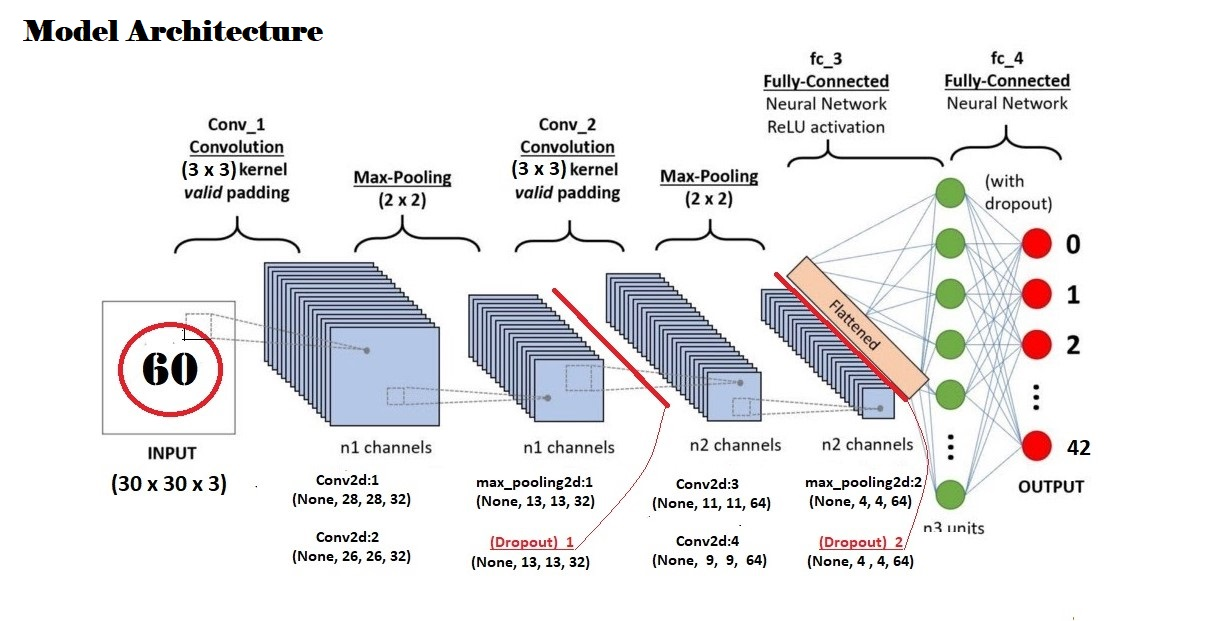

In [11]:

'''A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor'''
model = Sequential()
'''1'st layer convolutional  using 32 filter's with 3*3 filter size  and input shape is 30*30*3 where 30*30 height& width and 3 is RGB channel''' 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
'''A pooling operation that calculates the maximum, or largest, value in each patch of each feature map . we use 2*2 pool size'''
model.add(MaxPool2D(pool_size=(2, 2)))
'''Dropout is a technique where randomly selected neurons are ignored during training. This means that their contribution to the activation of downstream neurons is
temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.'''
model.add(Dropout(rate=0.25))

'''2'nd layer convolutional  using 64 filter's with 3*3 filter size  and input shape is 30*30*3 where 30*30 height& width and 3 is RGB channel '''
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
'''A pooling operation that calculates the maximum, or largest, value in each patch of each feature map . we use 2*2 pool size'''
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
'''Flattening is converting the data into a 1-dimensional array for inputting it to the next layer. 
We flatten the output of the convolutional layers to create a single long feature vector.
And it is connected to the final classification model, which is called a fully-connected layer'''
model.add(Flatten())
'''The dense layer is a fully connected layer, meaning all the neurons in a layer are connected to those in the next layer.'''
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_categories, activation='softmax'))







# Compiling Model

In [12]:


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

 # Callbacks API
      A callback is a set of functions to be applied at given stages of the training procedure.This includes stopping training when you reach a certain accuracy/loss score,saving your model as a checkpoint after each successful epoch,adjusting the learning rates over time,and more.
      1)ReduceLROnPlateau :
                  Reduce learning rate when a metric has stopped improving
      2)EarlyStopping     :
                  Stop training when a monitored metric has stopped improving.

In [13]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlyStop = EarlyStopping(patience=2)
learining_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor= 0.5,min_lr=0.00001)
callbacks = [earlyStop,learining_rate_reduction]

# Data Augmentation to get high accuracy

    The performance of deep learning neural networks often improves with the amount of data available.
    Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.

In [14]:

train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.15,
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   fill_mode="nearest")

# Model Training

* **Here we are first feeding the training data(Xtrain) and training labels(Ytrain). We then use Keras to allow our model to train for 15 epochs on a batch_size of 32**
* **A callback is a set of functions to be applied at given stages of the training procedure.This includes stopping training when you reach a certain accuracy/loss score,saving your model as a checkpoint after each successful epoch,adjusting the learning rates over time,and more.**
* **validation_data. Data on which to evaluate the loss and any model metrics at the end of each epoch.**

In [15]:
batch_size = 32
epochs = 15

history = model.fit(train_datagen.flow(X_train,Y_train,
                                       batch_size=batch_size),
                    
                    epochs=epochs,                       
                    callbacks=callbacks,
                    validation_data=(X_test, Y_test) )  


Epoch 1/15
981/981 [==============================] - 57s 58ms/step - loss: 2.7095 - accuracy: 0.2510 - val_loss: 0.3268 - val_accuracy: 0.9101
Epoch 2/15
981/981 [==============================] - 55s 56ms/step - loss: 0.6297 - accuracy: 0.7970 - val_loss: 0.0641 - val_accuracy: 0.9829
Epoch 3/15
981/981 [==============================] - 55s 56ms/step - loss: 0.3154 - accuracy: 0.9048 - val_loss: 0.0312 - val_accuracy: 0.9926
Epoch 4/15
981/981 [==============================] - 56s 57ms/step - loss: 0.2182 - accuracy: 0.9313 - val_loss: 0.0278 - val_accuracy: 0.9945
Epoch 5/15
981/981 [==============================] - 56s 57ms/step - loss: 0.1714 - accuracy: 0.9475 - val_loss: 0.0199 - val_accuracy: 0.9943
Epoch 6/15
981/981 [==============================] - 56s 57ms/step - loss: 0.1440 - accuracy: 0.9568 - val_loss: 0.0172 - val_accuracy: 0.9944

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/15
981/981 [==============================] - 5

# Save & Load Keras models

In [16]:
#model.save("gtsrb-german-traffic-sign p1.h5")

In [17]:
#from keras.models import load_model
#model = load_model('gtsrb-german-traffic-sign p1.h5')

# Plotting Graphs for accuracy 

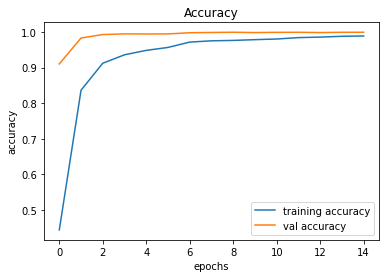

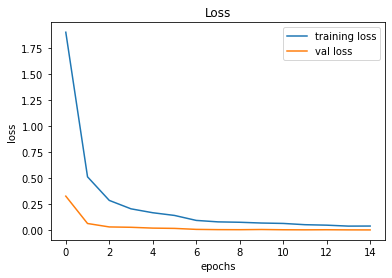

In [18]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Prepairng Test data

In [19]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values

data=[]

for a in images:
        
            image = Image.open(data_dir + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            data.append(image)
            
X_pred = np.array(data)
X_pred = X_pred/255 # normalize to the range 0-1

In [20]:
pred = model.predict_classes(X_pred)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Accuracy classification Score

    Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
    Accuracy = Number of correct predictions Total number of predictions.

In [21]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.47189231987332


In [22]:
test_pred= test.drop(['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2'],1)
test_pred.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


# Prediction 

In [23]:
test_pred['Predict']=pred
test_pred.head()

,ClassId,Path,Predict
0,16,Test/00000.png,16
1,1,Test/00001.png,1
2,38,Test/00002.png,38
3,33,Test/00003.png,33
4,11,Test/00004.png,11


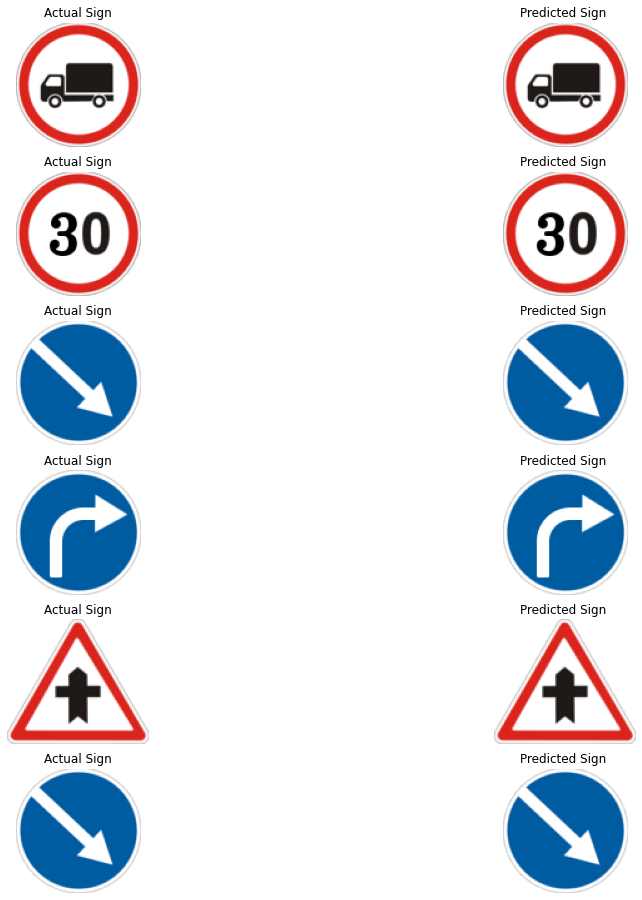

In [24]:
plt.figure(figsize=(16,16))
plt.tight_layout()
class_id=test_pred['ClassId'].iloc[0:6]
pred=test_pred['Predict'].iloc[0:6]
for i,j in enumerate(class_id):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(6,2,2*i+1)
    plt.axis('off')
    plt.title('Actual Sign')
    plt.imshow(img)
for i,j in enumerate(pred):
    img=Image.open('../input/gtsrb-german-traffic-sign/Meta/'+str(j)+'.png')
    plt.subplot(6,2,2*i+2)
    plt.axis('off')
    plt.title('Predicted Sign ')
    plt.imshow(img)   

#  Test a Model on New Images

3 Speed limit (60km/h)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


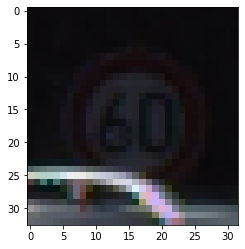

In [25]:
Image_Height = 30
Image_Width = 30
channels = 3
Image_Size =(Image_Width,Image_Height)
results = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing for vehicles over 3.5 metric tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Vehicles over 3.5 metric tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End of no passing by vehicles over 3.5 metric tons' }
from PIL import Image
import numpy as np
im=Image.open('../input/gtsrb-german-traffic-sign/Test/00023.png')
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
result=(print(pred,results[pred]))
result
